<a href="https://colab.research.google.com/github/bythyag/machine-learning-projects/blob/main/productivity_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import r2_score


In [10]:
# load dataset
user_data = pd.read_csv("/Users/thyag/Desktop/codes/machine-learning-projects/dataset/social_media_vs_productivity.csv")

In [11]:
# data preprocessing
user_data.dropna(inplace = True)

# convert to categorical data
map_socials = {
    "Facebook": 1,
    "Twitter": 2,
    "Telegram": 3,
    "TikTok": 4,
    "Instagram": 5,
}

map_job = {
    'Unemployed': 1,
    'Health': 2,
    'Finance': 3,
    'IT': 4,
    'Education': 5,
    'Student': 6
}

# 'Male' 'Female' 'Other'
map_gender = {
    'Male': 1,
    'Female': 2,
    'Other': 3
}

user_data['social_platform_preference'] = user_data['social_platform_preference'].map(map_socials)
user_data['job_type'] = user_data['job_type'].map(map_job)
user_data['gender'] = user_data['gender'].map(map_gender)

# integer encoding for boolean columns
for col in ['uses_focus_apps', 'has_digital_wellbeing_enabled']:
    if col in user_data.columns:
        user_data[col] = user_data[col].astype(int)

In [12]:
user_data.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,1,1,4.180940,1,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,0,0,4,11,21.927072,6.336688
1,46,1,2,3.249603,2,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,1,1,2,25,0.000000,3.412427
6,56,2,1,4.381070,4,60,3.902309,6.420989,5.976408,7.0,7.549849,2.252624,4,0,0,4,20,24.084905,5.501373
7,36,2,5,4.089168,2,49,6.560467,2.681830,2.446927,4.0,6.325507,0.747998,2,0,0,4,29,8.419648,3.444376
10,28,1,4,3.341559,2,57,11.022035,8.940636,7.983252,4.0,3.952547,1.028640,5,1,1,1,3,13.514515,9.414637


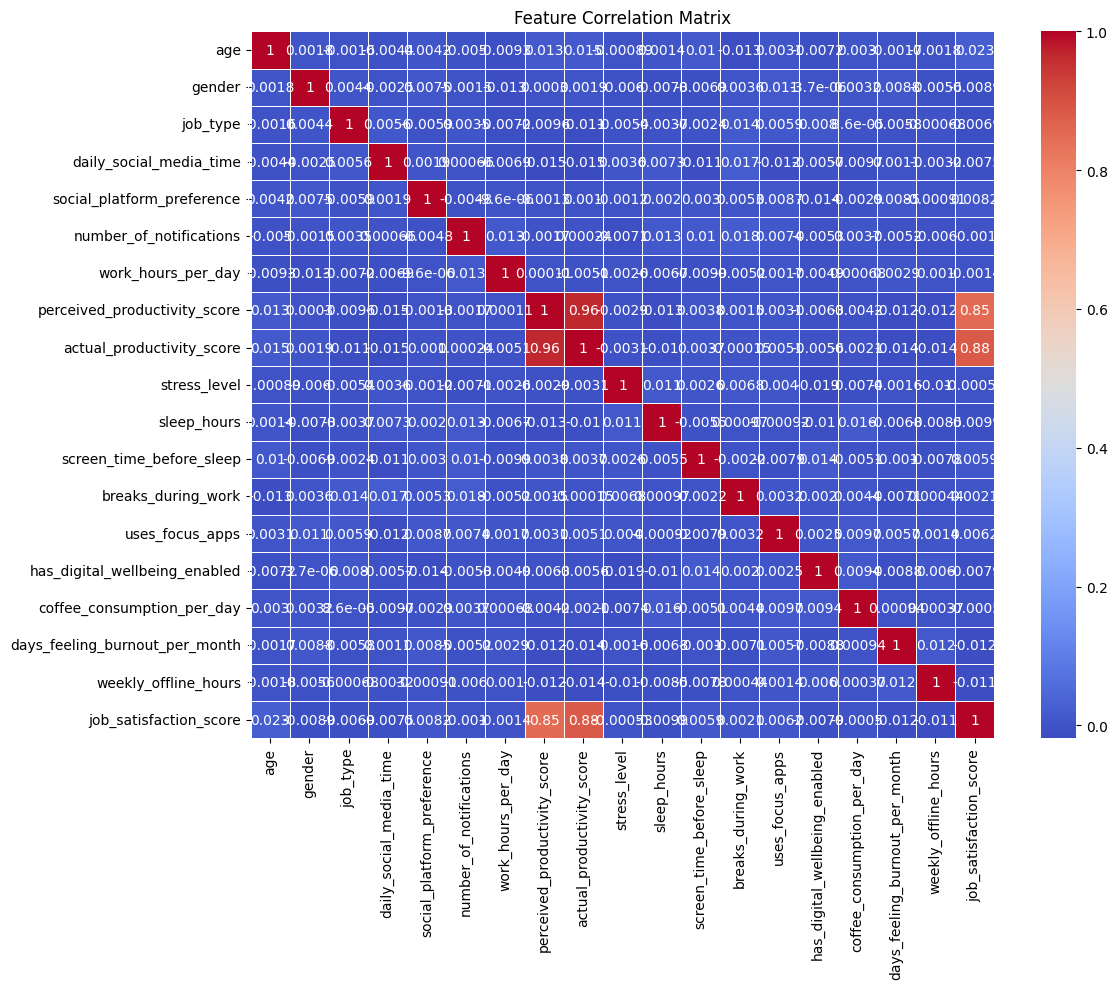

In [13]:
# correlation matrix

plt.figure(figsize=(12, 10))
correlation = user_data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [14]:
# drop unnecessary columns

user_data.drop('perceived_productivity_score', axis=1, inplace = True)

In [15]:
# perform feature scaling

# list of non-categorical columns based on your sample data
non_cat_cols = [
    'age',
    'daily_social_media_time',
    'number_of_notifications',
    'work_hours_per_day',
    'actual_productivity_score',
    'stress_level',
    'sleep_hours',
    'screen_time_before_sleep',
    'breaks_during_work',
    'coffee_consumption_per_day',
    'days_feeling_burnout_per_month',
    'weekly_offline_hours',
    'job_satisfaction_score'
]

# apply MinMaxScaler on the non-categorical columns
scaler = MinMaxScaler()
user_data[non_cat_cols] = scaler.fit_transform(user_data[non_cat_cols])

In [ ]:
# data splitting

X, y = user_data.drop(['actual_productivity_score'], axis=1), user_data['actual_productivity_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# logistic regression model

# Define parameter grid for Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False]
}

lr = LinearRegression()
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='r2')
grid_lr.fit(X_train, y_train)

print("Best parameters for Linear Regression:", grid_lr.best_params_)

# Predict on test set and evaluate
y_pred_lr = grid_lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression R2 score on test set:", r2_lr)

Best parameters for Linear Regression: {'fit_intercept': True}
Linear Regression R2 score on test set: 0.7846769984538334


In [21]:
# random forest model

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)

# Predict on test set and evaluate
y_pred_rf = grid_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R2 score on test set:", r2_rf)

Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Random Forest R2 score on test set: 0.7906428313101567


In [22]:
# XGBoost Regressor

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='r2')
grid_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost:", grid_xgb.best_params_)

# Predict on test set and evaluate
y_pred_xgb = grid_xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost R2 score on test set:", r2_xgb)

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
XGBoost R2 score on test set: 0.7934816283784362
